In [356]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Exploratory Data Analysis

Steps:

1. Load each dataset and create daily time series without missing values
2. Create combined dataset
3. Check for normality
4. Check correlations
5. Create feature dataset

### 1 Load datasets and create daily time series without missing values

#### S&P500 and related feature bundle

- S&P 500 prices / returns
- S&P500 30 day volatility
- S&P500 put call ratio
- VIX
- VIX put call ratio

In [357]:
# load historical data from csv

sp500_daily = pd.read_csv('data/HistoricalPrices-SP500 Daily.csv')
sp500_daily['Date'] = pd.to_datetime(sp500_daily['Date'])
sp500_daily = sp500_daily.set_index('Date')
sp500_daily = sp500_daily.sort_index()

# take close as the daily value
sp500_daily = sp500_daily[' Close']
sp500_daily = sp500_daily.rename('SP500')
sp500_daily.info()

<class 'pandas.core.series.Series'>
DatetimeIndex: 5912 entries, 2000-01-03 to 2023-07-03
Series name: SP500
Non-Null Count  Dtype  
--------------  -----  
5912 non-null   float64
dtypes: float64(1)
memory usage: 92.4 KB


In [358]:
# create log returns from daily values

sp500_log_returns = np.log(sp500_daily).diff().dropna()
sp500_log_returns = sp500_log_returns.rename('SP500 Log Returns')
sp500_log_returns.info()

<class 'pandas.core.series.Series'>
DatetimeIndex: 5911 entries, 2000-01-04 to 2023-07-03
Series name: SP500 Log Returns
Non-Null Count  Dtype  
--------------  -----  
5911 non-null   float64
dtypes: float64(1)
memory usage: 92.4 KB


In [359]:
# create 30 day volatility from sp500 daily

sp500_30_day_vol = sp500_daily.rolling(30).std().dropna()
sp500_30_day_vol = sp500_30_day_vol.rename('SP500 30 Day Volatility')
sp500_30_day_vol.info()


<class 'pandas.core.series.Series'>
DatetimeIndex: 5883 entries, 2000-02-14 to 2023-07-03
Series name: SP500 30 Day Volatility
Non-Null Count  Dtype  
--------------  -----  
5883 non-null   float64
dtypes: float64(1)
memory usage: 91.9 KB


In [360]:
# do same thing as above for SP500 put call ratio

sp500_put_call = pd.read_csv('data/SP500 daily put call.csv', skiprows=1)
sp500_put_call['Date'] = pd.to_datetime(sp500_put_call['Date'])
sp500_put_call = sp500_put_call.set_index('Date')
sp500_put_call = sp500_put_call.sort_index()
sp500_put_call.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2330 entries, 2010-07-06 to 2019-10-04
Data columns (total 4 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   SPX Put Call Ratio        2330 non-null   float64
 1   SPX Put Volume            2330 non-null   int64  
 2   SPX Call Volume           2330 non-null   int64  
 3   Total SPX Options Volume  2330 non-null   int64  
dtypes: float64(1), int64(3)
memory usage: 91.0 KB


In [361]:
# do same thing as above for VIX _history.csv

vix_daily = pd.read_csv('data/VIX_history.csv')
vix_daily['Date'] = pd.to_datetime(vix_daily['DATE'])
vix_daily = vix_daily.set_index('Date')
vix_daily = vix_daily.sort_index()

# take close as the daily value

vix_daily = vix_daily['CLOSE']
vix_daily = vix_daily.rename('VIX')
vix_daily.info()

<class 'pandas.core.series.Series'>
DatetimeIndex: 8421 entries, 1990-01-02 to 2023-05-30
Series name: VIX
Non-Null Count  Dtype  
--------------  -----  
8421 non-null   float64
dtypes: float64(1)
memory usage: 131.6 KB


# do the same thing as above for VIX put call ratio

vix_put_call = pd.read_csv('data/VIX daily put call.csv', skiprows=1)
vix_put_call['Date'] = pd.to_datetime(vix_put_call['Date'])
vix_put_call = vix_put_call.set_index('Date')
vix_put_call = vix_put_call.sort_index()
vix_put_call.info()

There is some error with decoding the csv file and loading the data --> drop it?

#### Financial feature bundle

- DJIA
- NASDAQ Comp
- 10 year treasury yield
- High yield corp bond
- Russell 2000
- Emerging Markets Bond
- MSCI world

In [362]:
# do same thing as above for DJIA

djia_daily = pd.read_csv('data/HistoricalPrices-DJIA Daily.csv')
djia_daily['Date'] = pd.to_datetime(djia_daily['Date'])
djia_daily = djia_daily.set_index('Date')
djia_daily = djia_daily.sort_index()

# take close as the daily value

djia_daily = djia_daily[' Close']
djia_daily = djia_daily.rename('DJIA')
djia_daily.info()


<class 'pandas.core.series.Series'>
DatetimeIndex: 5912 entries, 2000-01-03 to 2023-07-03
Series name: DJIA
Non-Null Count  Dtype  
--------------  -----  
5912 non-null   float64
dtypes: float64(1)
memory usage: 92.4 KB


In [363]:
# do same thing as above for NASDAQ

nasdaq_daily = pd.read_csv('data/HistoricalPrices-NASDAQ CI Daily.csv')
nasdaq_daily['Date'] = pd.to_datetime(nasdaq_daily['Date'])
nasdaq_daily = nasdaq_daily.set_index('Date')
nasdaq_daily = nasdaq_daily.sort_index()

# take close as the daily value

nasdaq_daily = nasdaq_daily[' Close']
nasdaq_daily = nasdaq_daily.rename('NASDAQ')
nasdaq_daily.info()

<class 'pandas.core.series.Series'>
DatetimeIndex: 5912 entries, 2000-01-03 to 2023-07-03
Series name: NASDAQ
Non-Null Count  Dtype  
--------------  -----  
5912 non-null   float64
dtypes: float64(1)
memory usage: 92.4 KB


In [364]:
# do the same thing as above for the 10 year treasury yield

ten_year_daily = pd.read_csv('data/treasury yield 10y daily.csv')
ten_year_daily['Date'] = pd.to_datetime(ten_year_daily['Date'])
ten_year_daily = ten_year_daily.set_index('Date')
ten_year_daily = ten_year_daily.sort_index()

# take close as the daily value

ten_year_daily = ten_year_daily['Close']
ten_year_daily = ten_year_daily.rename('10Y_Treasury')
ten_year_daily.info()

<class 'pandas.core.series.Series'>
DatetimeIndex: 19114 entries, 1962-01-02 to 2023-07-03
Series name: 10Y_Treasury
Non-Null Count  Dtype  
--------------  -----  
15387 non-null  float64
dtypes: float64(1)
memory usage: 298.7 KB


In [365]:
# do the same thing as above for high yield bond index

high_yield_daily = pd.read_csv('data/high yield bond index daily.csv')
high_yield_daily['Date'] = pd.to_datetime(high_yield_daily['DATE'])
high_yield_daily = high_yield_daily.set_index('Date')
high_yield_daily = high_yield_daily.sort_index()

# take close as the daily value

high_yield_daily = high_yield_daily['BAMLH0A0HYM2EY']
high_yield_daily = high_yield_daily.rename('High_Yield_Bonds')
high_yield_daily.info()

<class 'pandas.core.series.Series'>
DatetimeIndex: 6916 entries, 1996-12-31 to 2023-06-29
Series name: High_Yield_Bonds
Non-Null Count  Dtype  
--------------  -----  
6916 non-null   float64
dtypes: float64(1)
memory usage: 108.1 KB


In [366]:
# do same thing as above for RUSSELL

russell_daily = pd.read_csv('data/HistoricalPrices-Russell2000 Daily.csv')
russell_daily['Date'] = pd.to_datetime(russell_daily['Date'])
russell_daily = russell_daily.set_index('Date')
russell_daily = russell_daily.sort_index()

# take close as the daily value

russell_daily = russell_daily[' Close']
russell_daily = russell_daily.rename('RUSSELL')
russell_daily.info()


<class 'pandas.core.series.Series'>
DatetimeIndex: 5912 entries, 2000-01-03 to 2023-07-03
Series name: RUSSELL
Non-Null Count  Dtype  
--------------  -----  
5912 non-null   float64
dtypes: float64(1)
memory usage: 92.4 KB


In [367]:
# do the same thing as above for emerging markets bonds index

emerging_markets_daily = pd.read_csv('data/HistoricalPrices - EMB Daily.csv')
emerging_markets_daily['Date'] = pd.to_datetime(emerging_markets_daily['Date'])
emerging_markets_daily = emerging_markets_daily.set_index('Date')
emerging_markets_daily = emerging_markets_daily.sort_index()

# take close as the daily value

emerging_markets_daily = emerging_markets_daily[' Close']
emerging_markets_daily = emerging_markets_daily.rename('EMB_Yield')
emerging_markets_daily.info()

<class 'pandas.core.series.Series'>
DatetimeIndex: 3909 entries, 2007-12-19 to 2023-07-03
Series name: EMB_Yield
Non-Null Count  Dtype  
--------------  -----  
3909 non-null   float64
dtypes: float64(1)
memory usage: 61.1 KB


In [368]:
# do the same thing as above for msci world index

msci_world_daily = pd.read_csv('data/msci world daily prices.csv')
msci_world_daily['Date'] = pd.to_datetime(msci_world_daily['Date'])
msci_world_daily = msci_world_daily.set_index('Date')

# take close as the daily value

msci_world_daily = msci_world_daily['Close']
msci_world_daily = msci_world_daily.rename('MSCI_World')
msci_world_daily.info()

<class 'pandas.core.series.Series'>
DatetimeIndex: 15984 entries, 1972-01-03 to 2023-07-04
Series name: MSCI_World
Non-Null Count  Dtype  
--------------  -----  
13209 non-null  float64
dtypes: float64(1)
memory usage: 249.8 KB


#### Economic feature bundle

- Consumer sentiment index
- USD Index
- Gold spot price
- Oil price

In [369]:
# do the same thing as above for consumer sentiment index

consumer_sentiment_monthly= pd.read_csv('data/consumer sentiment monthly.csv')
consumer_sentiment_monthly['DATE'] = pd.to_datetime(consumer_sentiment_monthly['DATE'])
consumer_sentiment_monthly = consumer_sentiment_monthly.set_index('DATE')

# replace . with nan

consumer_sentiment_monthly = consumer_sentiment_monthly.replace('.', np.nan)

# change data type to float

consumer_sentiment_monthly['UMCSENT'] = consumer_sentiment_monthly['UMCSENT'].astype(float)

# extrapolate trend for missing values

consumer_sentiment_monthly['UMSCENT'] = consumer_sentiment_monthly['UMCSENT'].interpolate(method='linear')

# rename column to consumer sentiment and take only the column we need

consumer_sentiment_monthly = consumer_sentiment_monthly['UMCSENT']
consumer_sentiment_monthly = consumer_sentiment_monthly.rename('Consumer_Sentiment')

# resample to daily

consumer_sentiment_daily = consumer_sentiment_monthly.resample('D').ffill()
print(consumer_sentiment_daily.tail())
consumer_sentiment_daily.info()



DATE
2023-04-27    63.5
2023-04-28    63.5
2023-04-29    63.5
2023-04-30    63.5
2023-05-01    59.2
Freq: D, Name: Consumer_Sentiment, dtype: float64
<class 'pandas.core.series.Series'>
DatetimeIndex: 25749 entries, 1952-11-01 to 2023-05-01
Freq: D
Series name: Consumer_Sentiment
Non-Null Count  Dtype  
--------------  -----  
19322 non-null  float64
dtypes: float64(1)
memory usage: 402.3 KB


In [370]:
# do the same thing as above for USD index

usd_index_daily = pd.read_csv('data/HistoricalPrices-USD Daily.csv')
usd_index_daily['Date'] = pd.to_datetime(usd_index_daily['Date'])
usd_index_daily = usd_index_daily.set_index('Date')
usd_index_daily = usd_index_daily.sort_index()

# take close as the daily value

usd_index_daily = usd_index_daily[' Close']
usd_index_daily = usd_index_daily.rename('USD_Index')
usd_index_daily.info()


<class 'pandas.core.series.Series'>
DatetimeIndex: 6045 entries, 2000-01-03 to 2023-07-04
Series name: USD_Index
Non-Null Count  Dtype  
--------------  -----  
6045 non-null   float64
dtypes: float64(1)
memory usage: 94.5 KB


In [371]:
# do the same thing as above for gold

gold_daily = pd.read_csv('data/gold prices daily.csv')
gold_daily['Date'] = pd.to_datetime(gold_daily['Date'])
gold_daily = gold_daily.set_index('Date')

# take close as the daily value

gold_daily = gold_daily['Close']
gold_daily = gold_daily.rename('Gold')
gold_daily.info()


<class 'pandas.core.series.Series'>
DatetimeIndex: 5703 entries, 2000-01-04 to 2022-09-02
Series name: Gold
Non-Null Count  Dtype  
--------------  -----  
5703 non-null   float64
dtypes: float64(1)
memory usage: 89.1 KB


In [372]:
# do the same thing as above for oil

oil_daily = pd.read_csv('data/DCOILWTICO.csv')
oil_daily['Date'] = pd.to_datetime(oil_daily['DATE'])
oil_daily = oil_daily.set_index('Date')

# replace . with nan

oil_daily = oil_daily.replace('.', np.nan)

# change data type to float

oil_daily['DCOILWTICO'] = oil_daily['DCOILWTICO'].astype(float)

# extrapolate trend for missing values

oil_daily['Oil'] = oil_daily['DCOILWTICO'].interpolate(method='linear')

# take close as the daily value

oil_daily = oil_daily['DCOILWTICO']
oil_daily = oil_daily.rename('Oil').astype(float)
oil_daily.info()


<class 'pandas.core.series.Series'>
DatetimeIndex: 9778 entries, 1986-01-02 to 2023-06-26
Series name: Oil
Non-Null Count  Dtype  
--------------  -----  
9443 non-null   float64
dtypes: float64(1)
memory usage: 152.8 KB


### 2 Create combined dataset


In [373]:
# create a df with all the daily data

daily_df = pd.concat([sp500_daily, sp500_log_returns, sp500_30_day_vol, sp500_put_call, vix_daily, djia_daily, nasdaq_daily, ten_year_daily, high_yield_daily, russell_daily, emerging_markets_daily, msci_world_daily, consumer_sentiment_daily, usd_index_daily, gold_daily, oil_daily], axis=1)
daily_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 25804 entries, 1952-11-01 to 2023-07-04
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   SP500                     5912 non-null   float64
 1   SP500 Log Returns         5911 non-null   float64
 2   SP500 30 Day Volatility   5883 non-null   float64
 3   SPX Put Call Ratio        2330 non-null   float64
 4   SPX Put Volume            2330 non-null   float64
 5   SPX Call Volume           2330 non-null   float64
 6   Total SPX Options Volume  2330 non-null   float64
 7   VIX                       8421 non-null   float64
 8   DJIA                      5912 non-null   float64
 9   NASDAQ                    5912 non-null   float64
 10  10Y_Treasury              15387 non-null  float64
 11  High_Yield_Bonds          6916 non-null   float64
 12  RUSSELL                   5912 non-null   float64
 13  EMB_Yield                 3909 non-null   fl

In [374]:
# drop rows with missing values from df

daily_df = daily_df.dropna()
daily_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2265 entries, 2010-07-07 to 2019-10-04
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   SP500                     2265 non-null   float64
 1   SP500 Log Returns         2265 non-null   float64
 2   SP500 30 Day Volatility   2265 non-null   float64
 3   SPX Put Call Ratio        2265 non-null   float64
 4   SPX Put Volume            2265 non-null   float64
 5   SPX Call Volume           2265 non-null   float64
 6   Total SPX Options Volume  2265 non-null   float64
 7   VIX                       2265 non-null   float64
 8   DJIA                      2265 non-null   float64
 9   NASDAQ                    2265 non-null   float64
 10  10Y_Treasury              2265 non-null   float64
 11  High_Yield_Bonds          2265 non-null   float64
 12  RUSSELL                   2265 non-null   float64
 13  EMB_Yield                 2265 non-null   flo

The data above needs to be restricted to the length of the shortest time series. In this case this is the SPX put call time series ranging from 2010-07-06 to 2019-10-04.

### 3 Check for normality

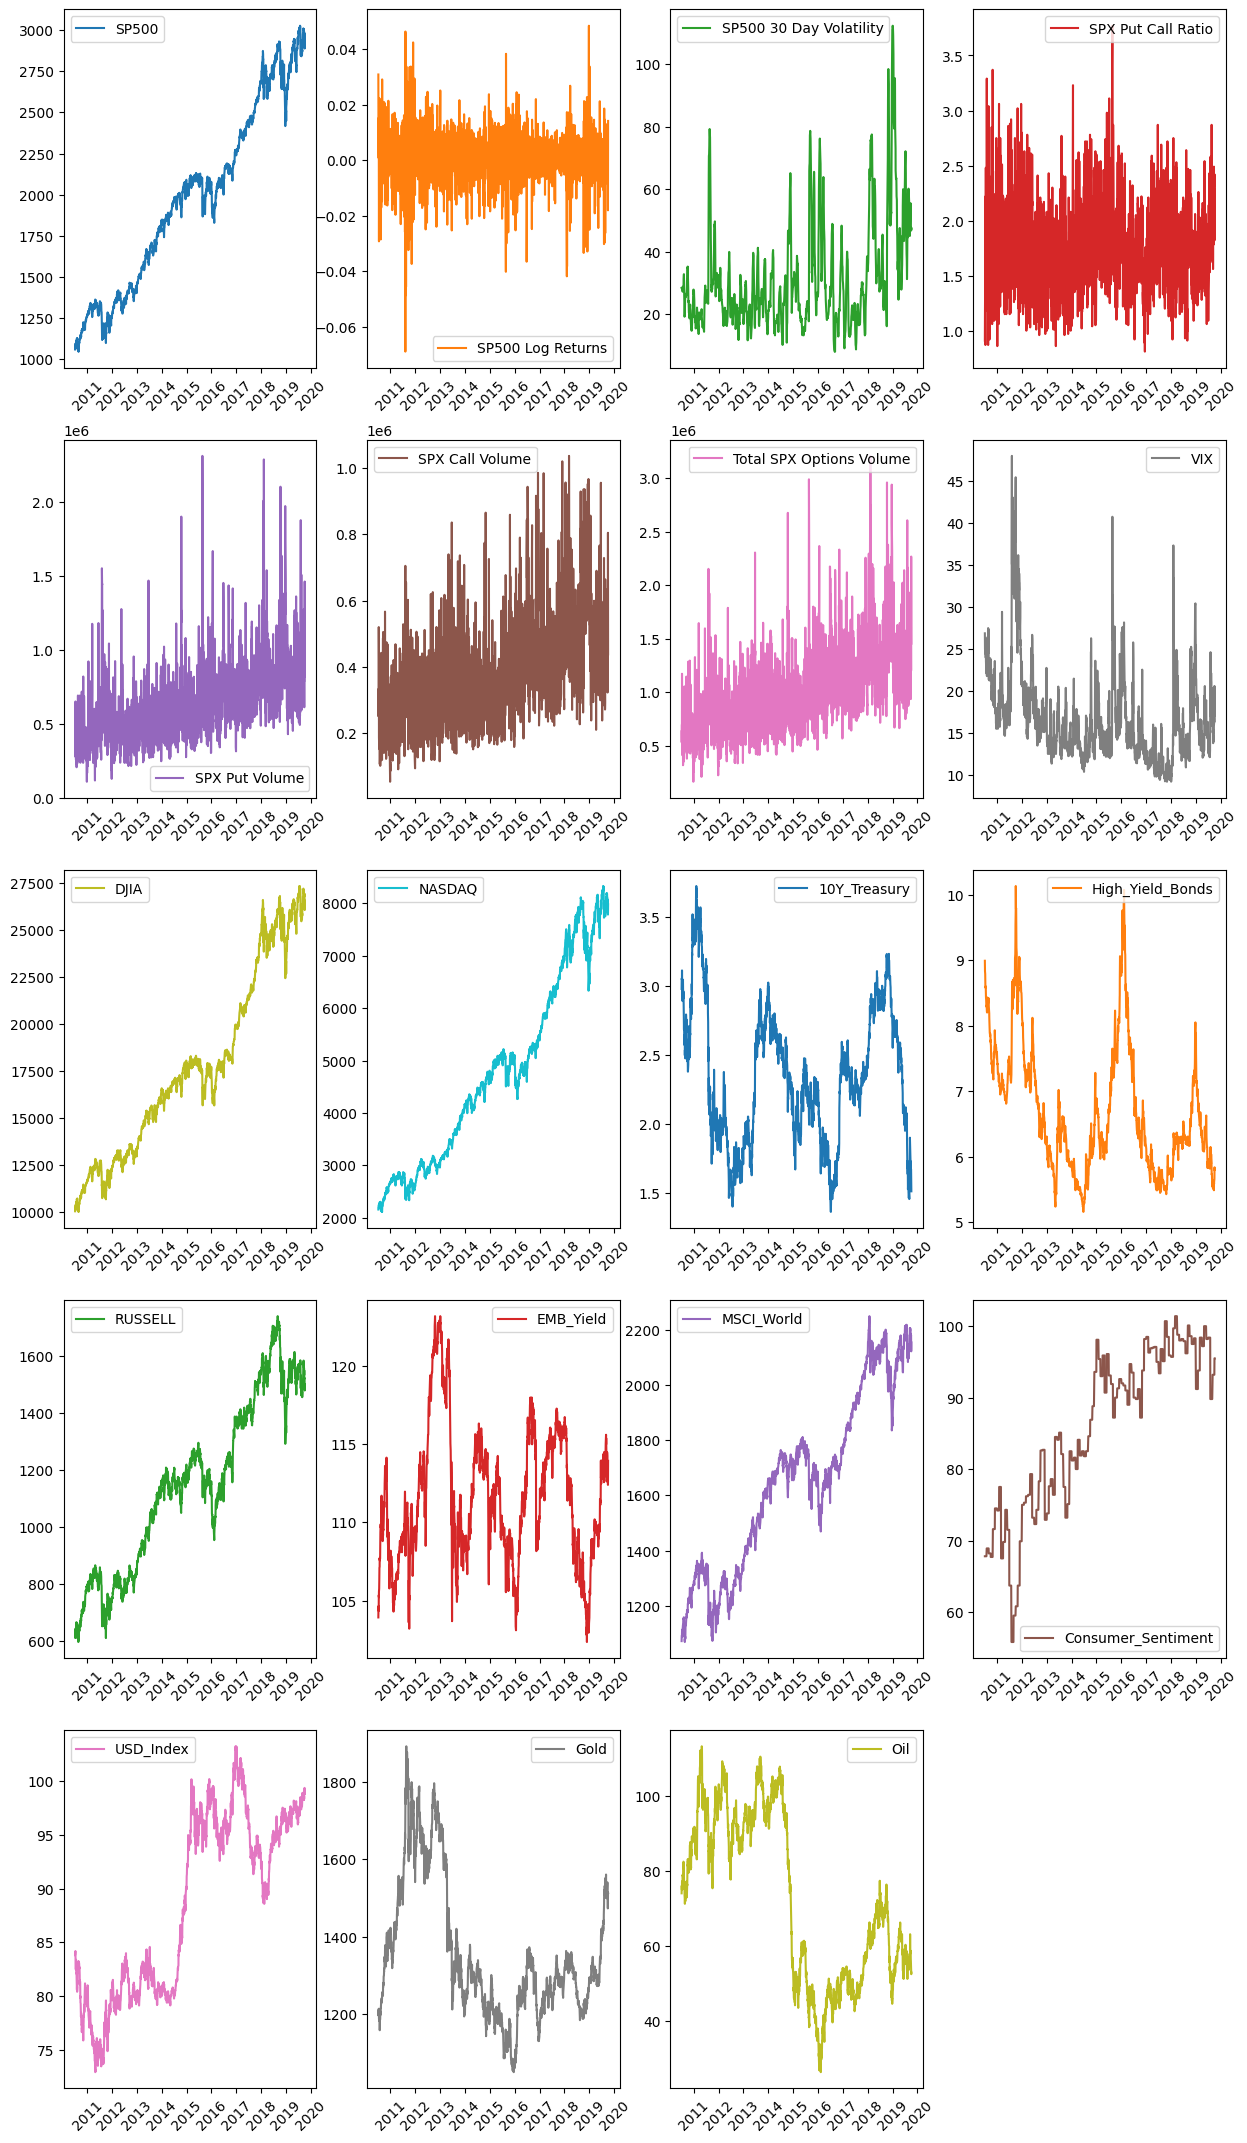

In [375]:
# create lineplot grid for all columns with individual y axis

daily_df.plot(subplots=True, layout=(5,4), figsize=(15,27), sharex=False, sharey=False, rot=45)
plt.show()

The variables representing price levels show non-stationary trend behavior. For further modelling it might make sense to use the daily returns of the time series instead.

In [376]:
# create copy of daily_df called daily_df_log_returns

daily_df_log_returns = daily_df.copy()

# convert variables with prices levels to log returns

daily_df_log_returns['DJIA_log_returns'] = np.log(daily_df['DJIA']).diff().dropna()
daily_df_log_returns['NASDAQ_log_returns'] = np.log(daily_df['NASDAQ']).diff().dropna()
daily_df_log_returns['RUSSELL_log_returns'] = np.log(daily_df['RUSSELL']).diff().dropna()
daily_df_log_returns['MSCI_World_log_returns'] = np.log(daily_df['MSCI_World']).diff().dropna()
daily_df_log_returns['USD_Index_log_returns'] = np.log(daily_df['USD_Index']).diff().dropna()
daily_df_log_returns['Gold_log_returns'] = np.log(daily_df['Gold']).diff().dropna()
daily_df_log_returns['Oil_log_returns'] = np.log(daily_df['Oil']).diff().dropna()

# do the same for options volumes

daily_df_log_returns['SP500_put_log_change'] = np.log(daily_df['SPX Put Volume']).diff().dropna()
daily_df_log_returns['SP500_call_log_change'] = np.log(daily_df['SPX Call Volume']).diff().dropna()
daily_df_log_returns['SP500_total_opts_log_change'] = np.log(daily_df['Total SPX Options Volume']).diff().dropna()

# do the same for consumer sentiment

daily_df_log_returns['Consumer_Sentiment_log_change'] = np.log(daily_df['Consumer_Sentiment']).diff().dropna()

# drop all columns with prices levels,  volumes and consumer sentiment

daily_df_log_returns = daily_df_log_returns.drop(['SP500', 'SPX Put Volume', 'SPX Call Volume', 'Total SPX Options Volume', 'Consumer_Sentiment', 'DJIA', 'NASDAQ', 'RUSSELL', 'MSCI_World', 'USD_Index', 'Gold', 'Oil'], axis=1).dropna()
daily_df_log_returns.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2264 entries, 2010-07-08 to 2019-10-04
Data columns (total 18 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   SP500 Log Returns              2264 non-null   float64
 1   SP500 30 Day Volatility        2264 non-null   float64
 2   SPX Put Call Ratio             2264 non-null   float64
 3   VIX                            2264 non-null   float64
 4   10Y_Treasury                   2264 non-null   float64
 5   High_Yield_Bonds               2264 non-null   float64
 6   EMB_Yield                      2264 non-null   float64
 7   DJIA_log_returns               2264 non-null   float64
 8   NASDAQ_log_returns             2264 non-null   float64
 9   RUSSELL_log_returns            2264 non-null   float64
 10  MSCI_World_log_returns         2264 non-null   float64
 11  USD_Index_log_returns          2264 non-null   float64
 12  Gold_log_returns              

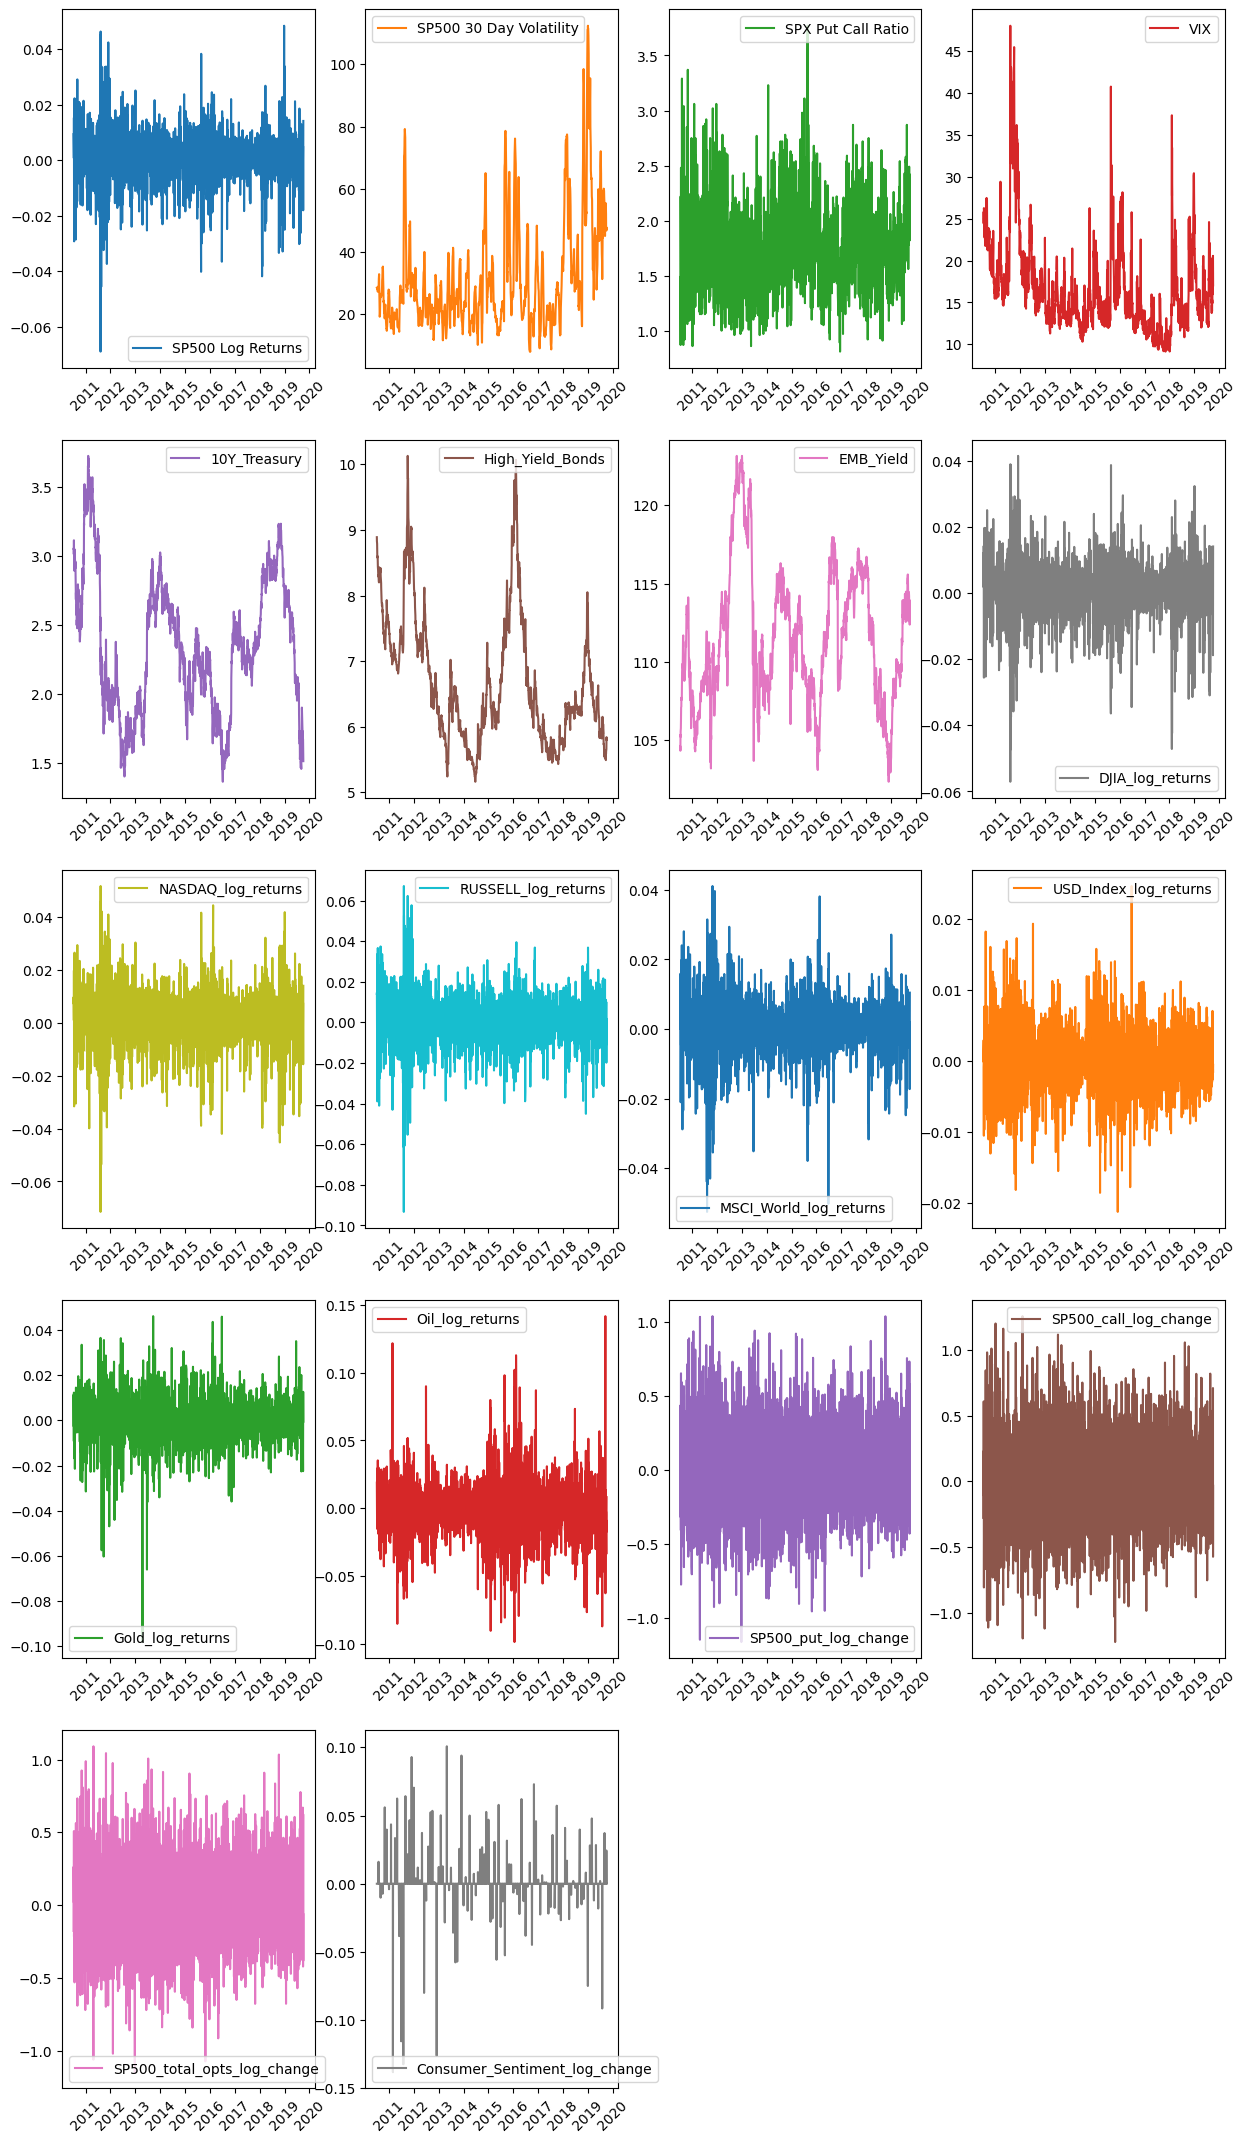

In [377]:
# create lineplot grid for all columns with individual y axis

daily_df_log_returns.plot(subplots=True, layout=(5,4), figsize=(15,27), sharex=False, sharey=False, rot=45)
plt.show()

Based on the line plots above, return distributions seem more stationary than price levels.

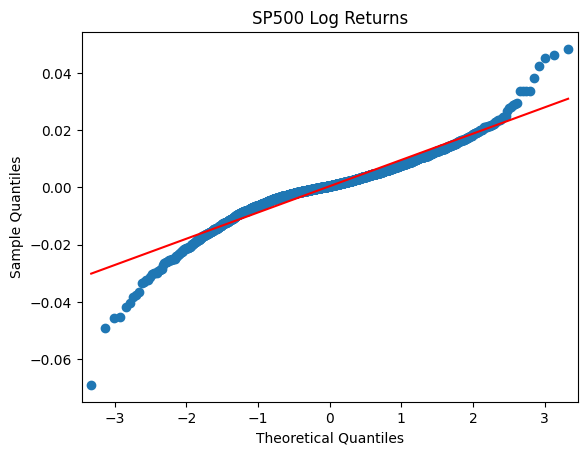

SP500 Log Returns
ShapiroResult(statistic=0.9379767179489136, pvalue=9.176018740710917e-30)




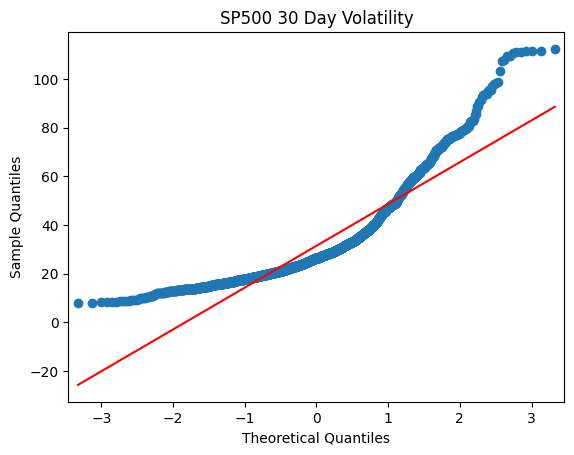

SP500 30 Day Volatility
ShapiroResult(statistic=0.8369954824447632, pvalue=2.942726775082116e-43)




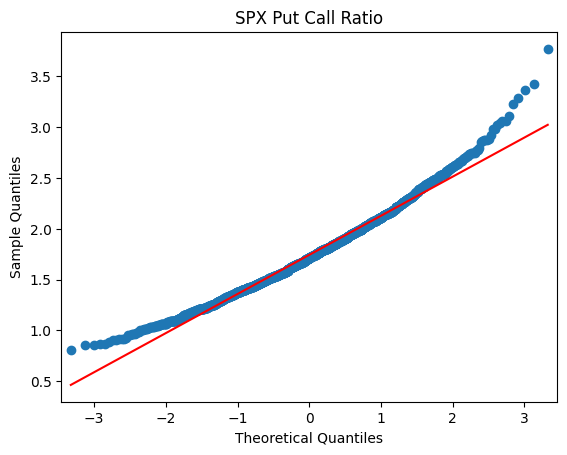

SPX Put Call Ratio
ShapiroResult(statistic=0.9821431636810303, pvalue=3.0094365931896045e-16)




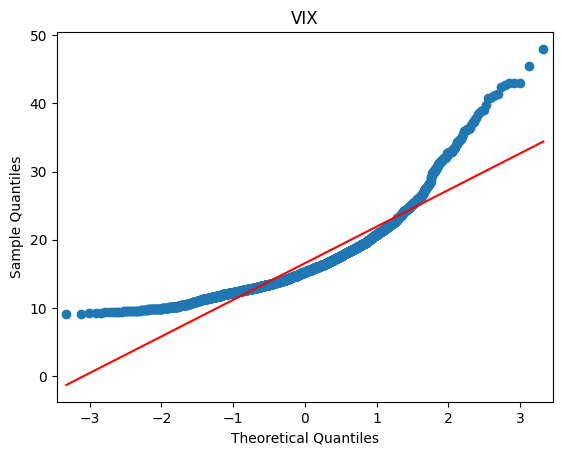

VIX
ShapiroResult(statistic=0.8504093289375305, pvalue=5.951314577987498e-42)




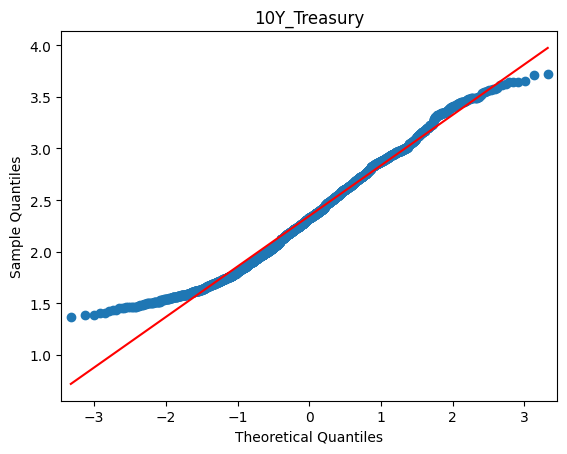

10Y_Treasury
ShapiroResult(statistic=0.9826067686080933, pvalue=5.213693195839928e-16)




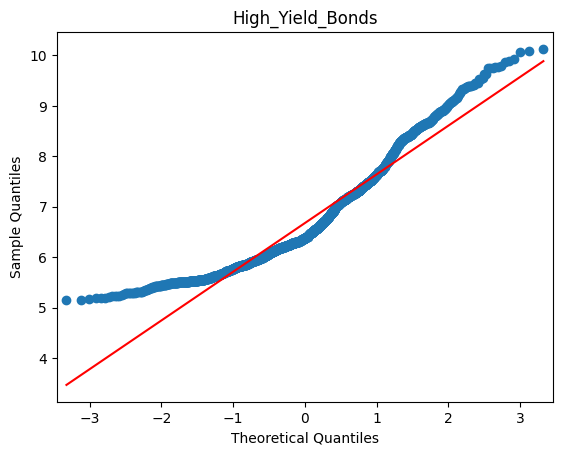

High_Yield_Bonds
ShapiroResult(statistic=0.9263016581535339, pvalue=5.584206484732416e-32)




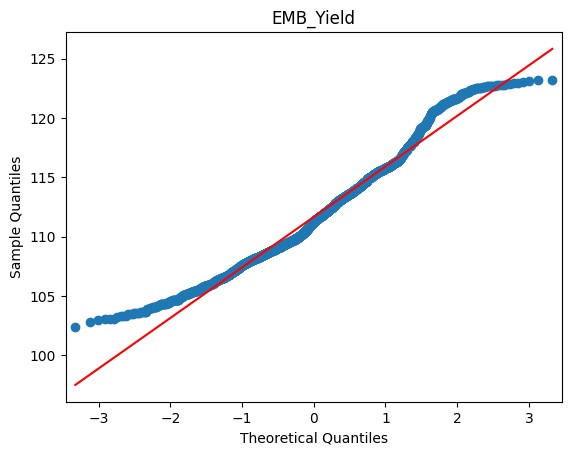

EMB_Yield
ShapiroResult(statistic=0.9752064347267151, pvalue=2.1777302893896614e-19)




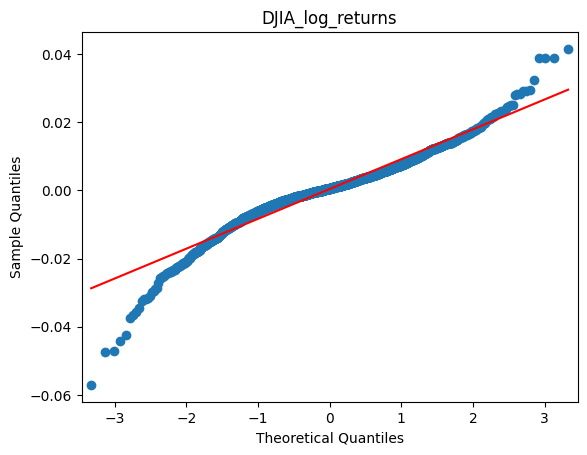

DJIA_log_returns
ShapiroResult(statistic=0.9469870924949646, pvalue=8.06314163859535e-28)




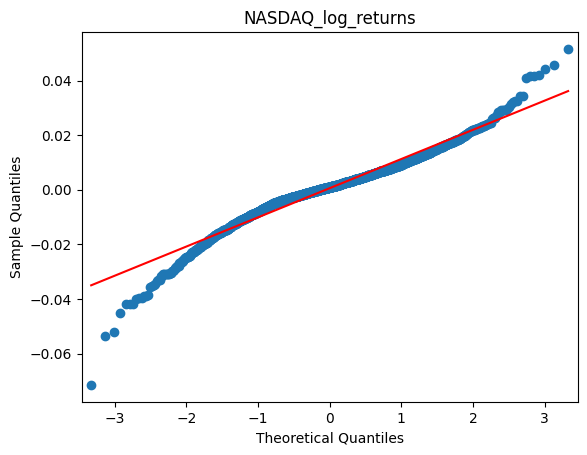

NASDAQ_log_returns
ShapiroResult(statistic=0.9554604291915894, pvalue=9.594733382416416e-26)




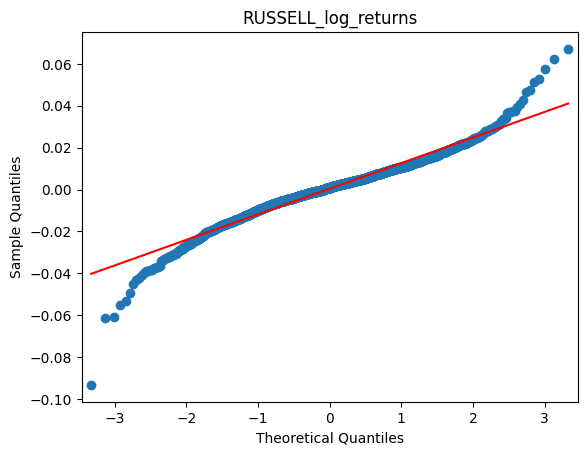

RUSSELL_log_returns
ShapiroResult(statistic=0.959817111492157, pvalue=1.4746698535569951e-24)




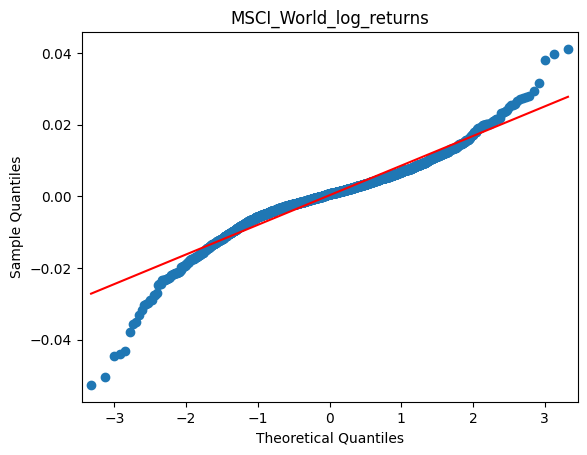

MSCI_World_log_returns
ShapiroResult(statistic=0.9413013458251953, pvalue=4.495648315375192e-29)




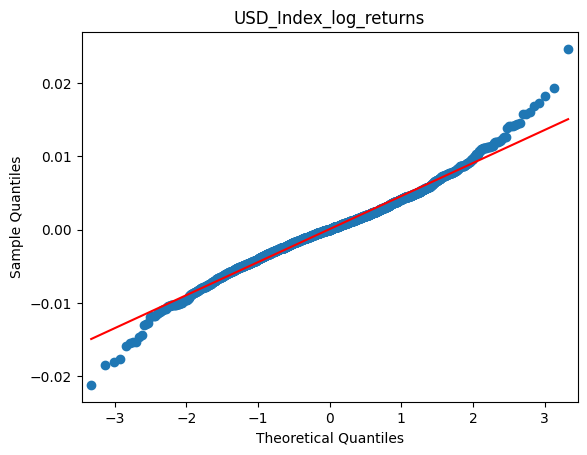

USD_Index_log_returns
ShapiroResult(statistic=0.9848225116729736, pvalue=8.366622993645923e-15)




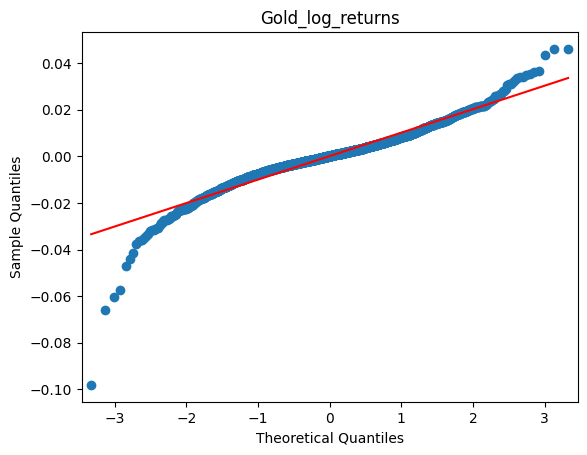

Gold_log_returns
ShapiroResult(statistic=0.9379228949546814, pvalue=8.94779604230103e-30)




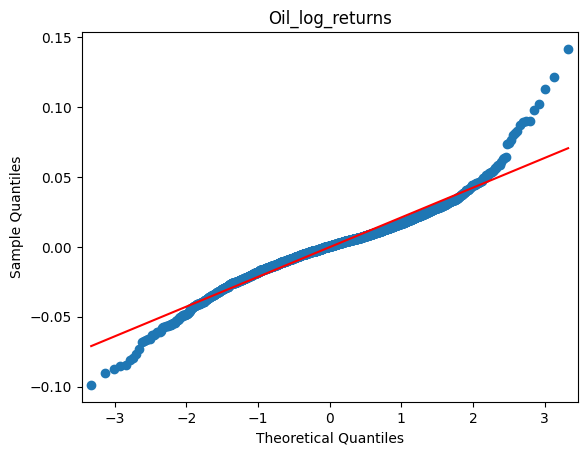

Oil_log_returns
ShapiroResult(statistic=0.956696629524231, pvalue=2.0393256180248453e-25)




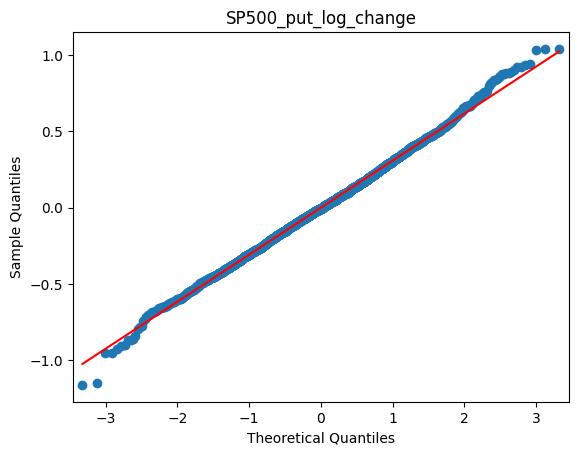

SP500_put_log_change
ShapiroResult(statistic=0.9982432723045349, pvalue=0.015249986201524734)




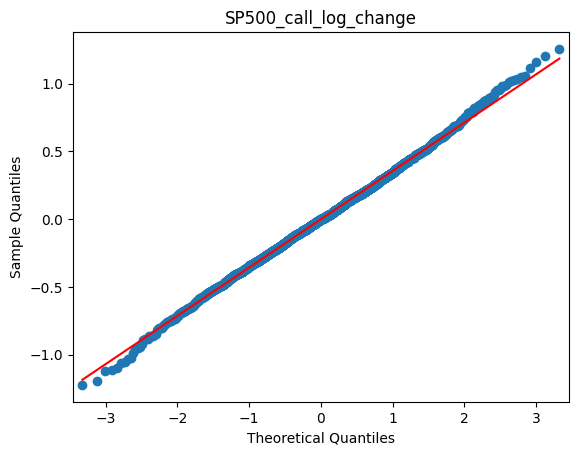

SP500_call_log_change
ShapiroResult(statistic=0.9988065958023071, pvalue=0.11989135295152664)




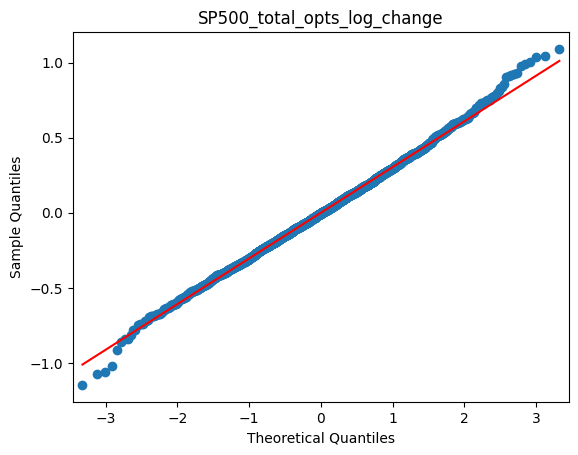

SP500_total_opts_log_change
ShapiroResult(statistic=0.9982571005821228, pvalue=0.016043854877352715)




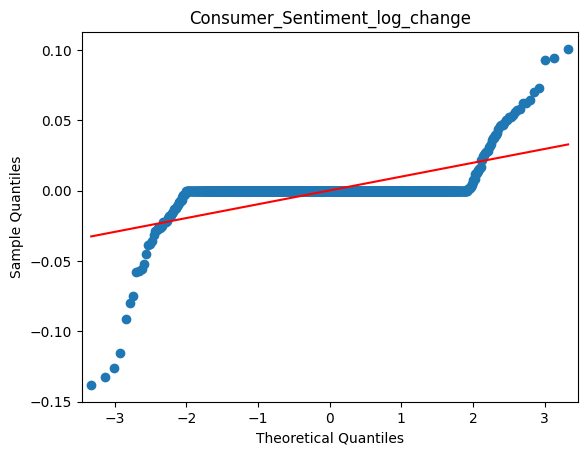

Consumer_Sentiment_log_change
ShapiroResult(statistic=0.19018065929412842, pvalue=0.0)




In [378]:
# plot qq plot for all columns and apply shapiro wilk test

import scipy.stats as stats
import statsmodels.api as sm

for col in daily_df_log_returns.columns:
    sm.qqplot(daily_df_log_returns[col], line='s')
    plt.title(col)
    plt.show()
    print(col)
    print(stats.shapiro(daily_df_log_returns[col]))
    print('\n')


The daily log change in SP500 call option volume seems to be the only variable for which the assumption of normality can't be rejected. Due to all other variables very likely not being normally distribured, statistical methods assuming normality should not be applied to this dataset.

### 4 Check correlations

#### Pearson Correlation Coefficient

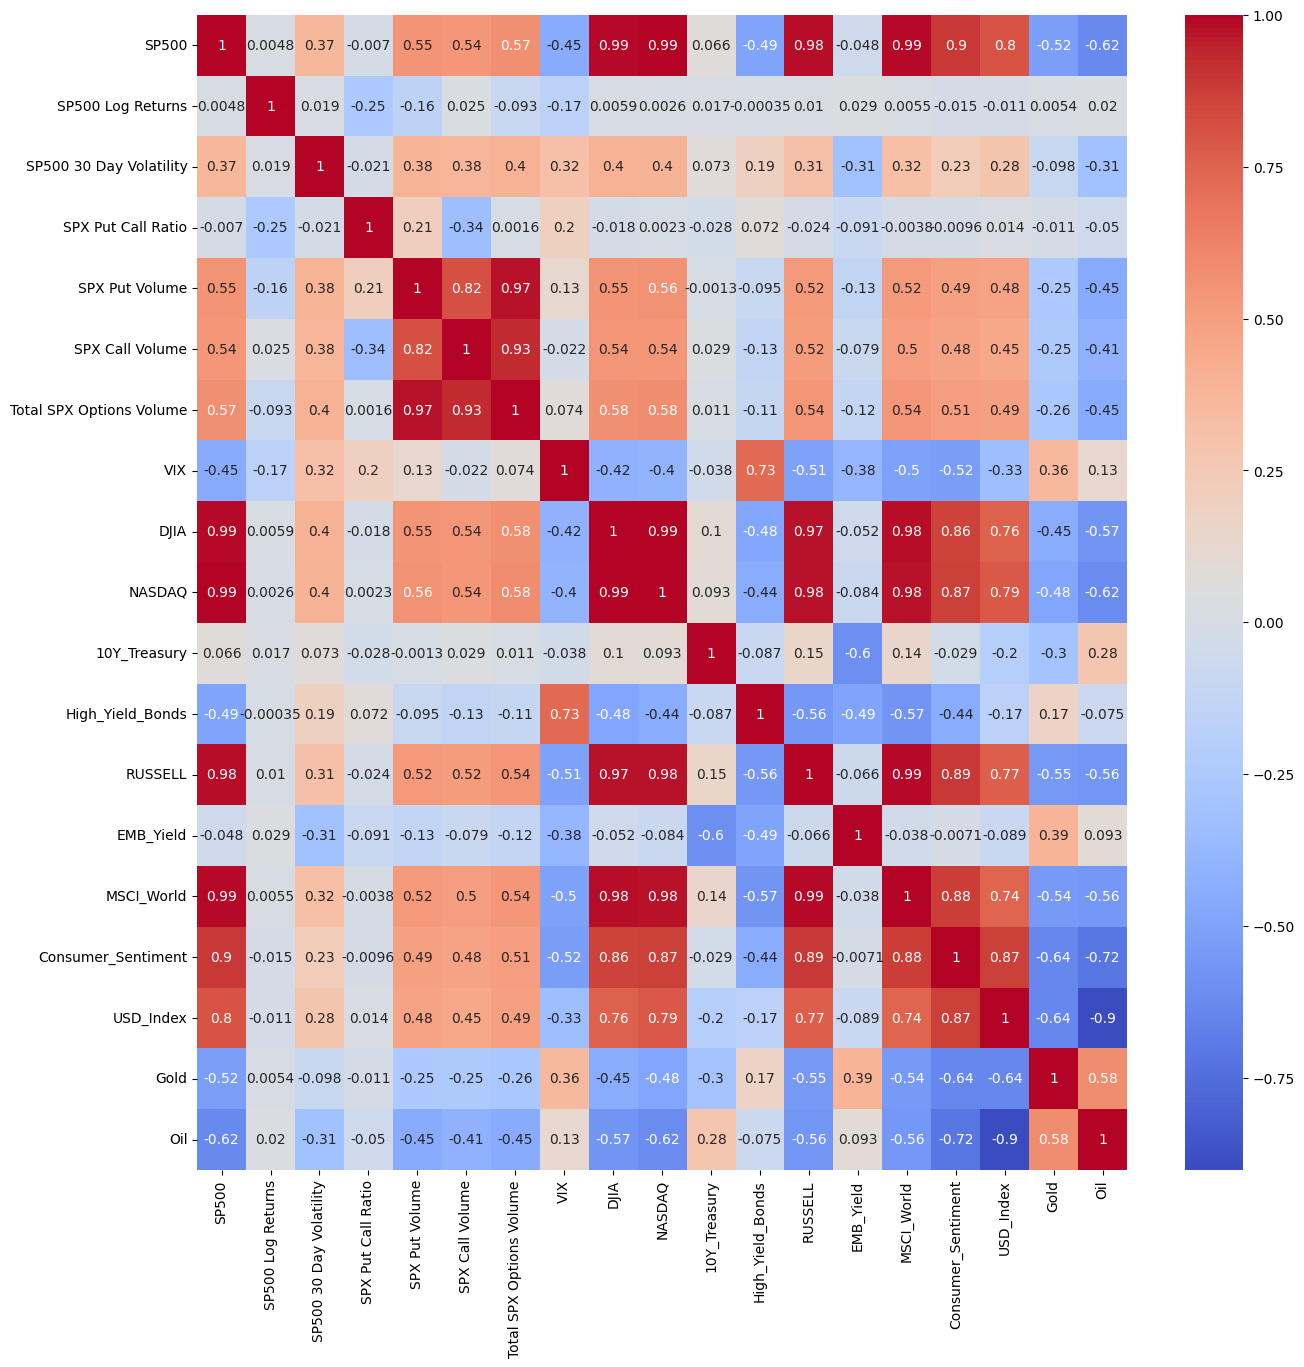

In [379]:
# create a correlation matrix with heatmap

corr_matrix = daily_df.corr()
fig = plt.figure(figsize=(15,15))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

The US stock indices price levels show an extremly strong correlation among themselves and with the consumer sentiment.

The SP500 30 day volatility shows a moderate positive correlation with the US stock indices price levels and a moderate negative correlation with oil price levels and EMB yields.

The strongest negative correlation is exhibited by oil price levels and the USD index level of -0.9

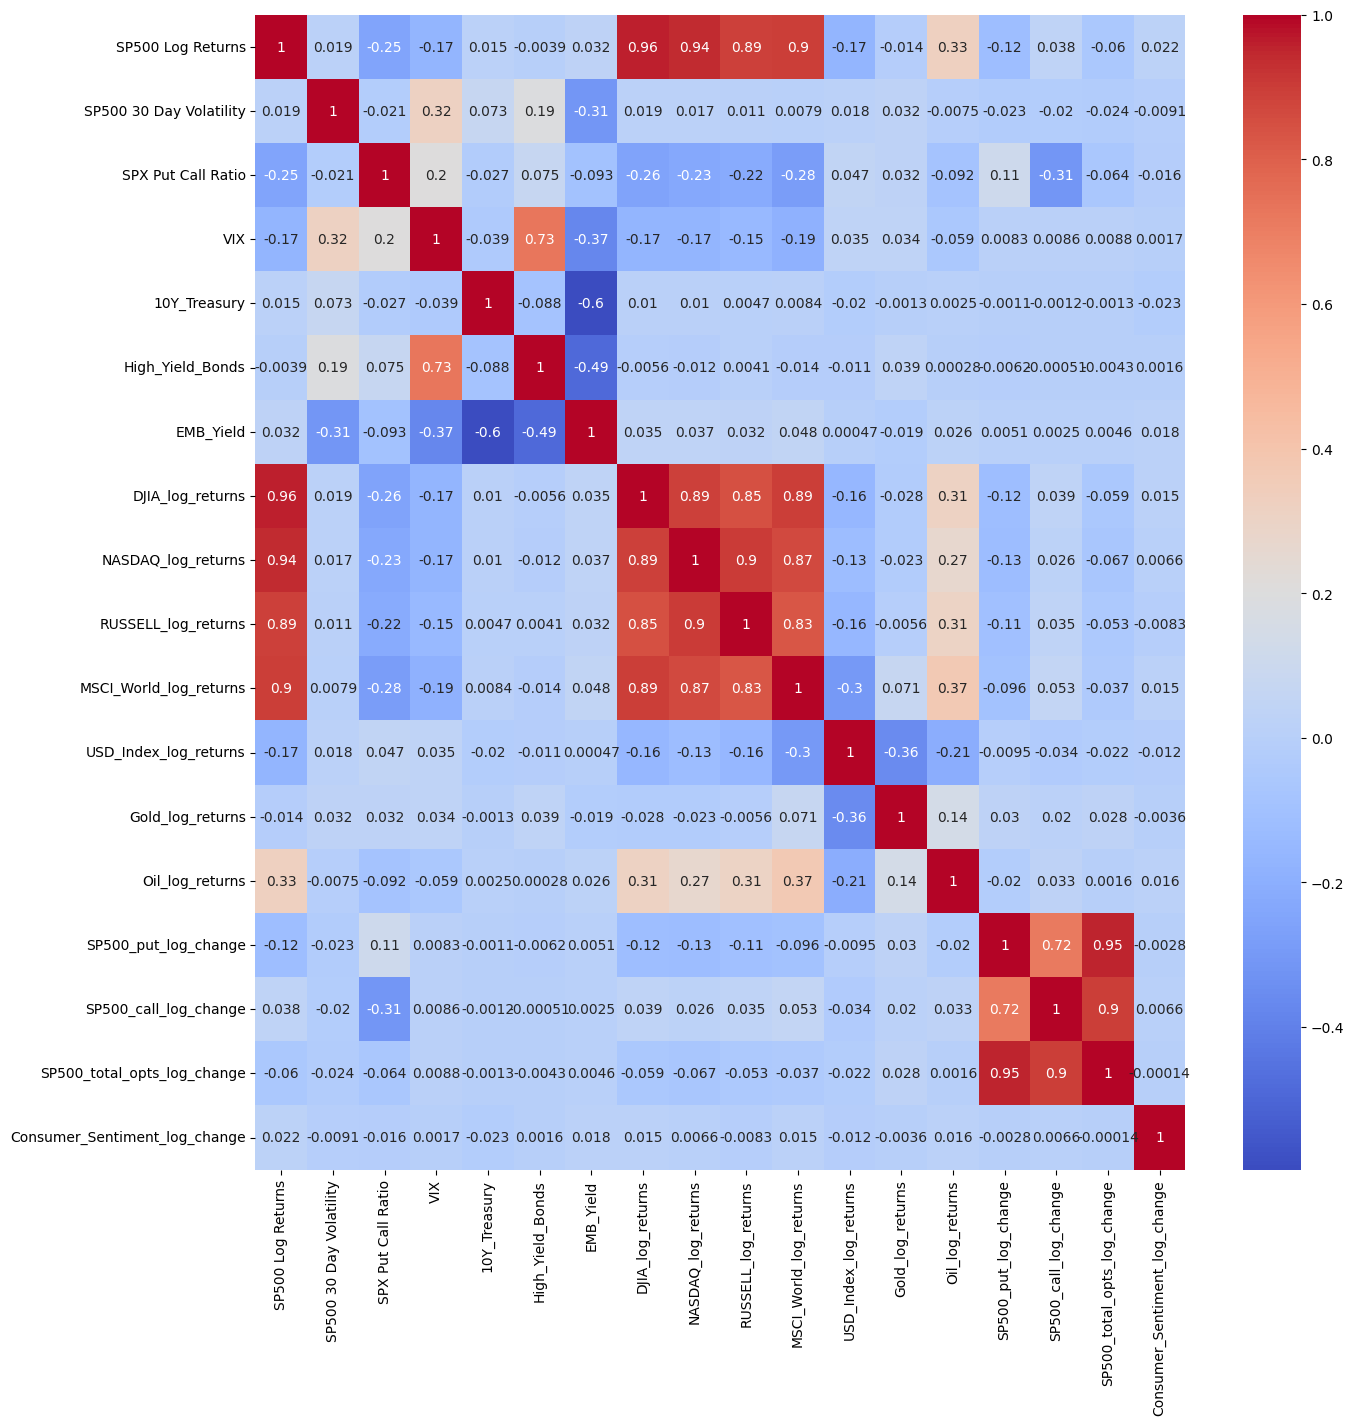

In [380]:
# create a correlation matrix with heatmap

corr_matrix = daily_df_log_returns.corr()
fig = plt.figure(figsize=(15,15))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

The daily log returns of the different US stock indices seem to correlate strongly positive, as well as the log changes in option volumes.

The SP500 30 day volatility has a minor positive correlation with VIX and a minor negative one with the Emerging Markets Bonds yield.

EMB yields and 10 Year Treasury yields also have the strongest negative correlation among the variables with -0.6.

#### Spearman Rank Correlation Coefficient

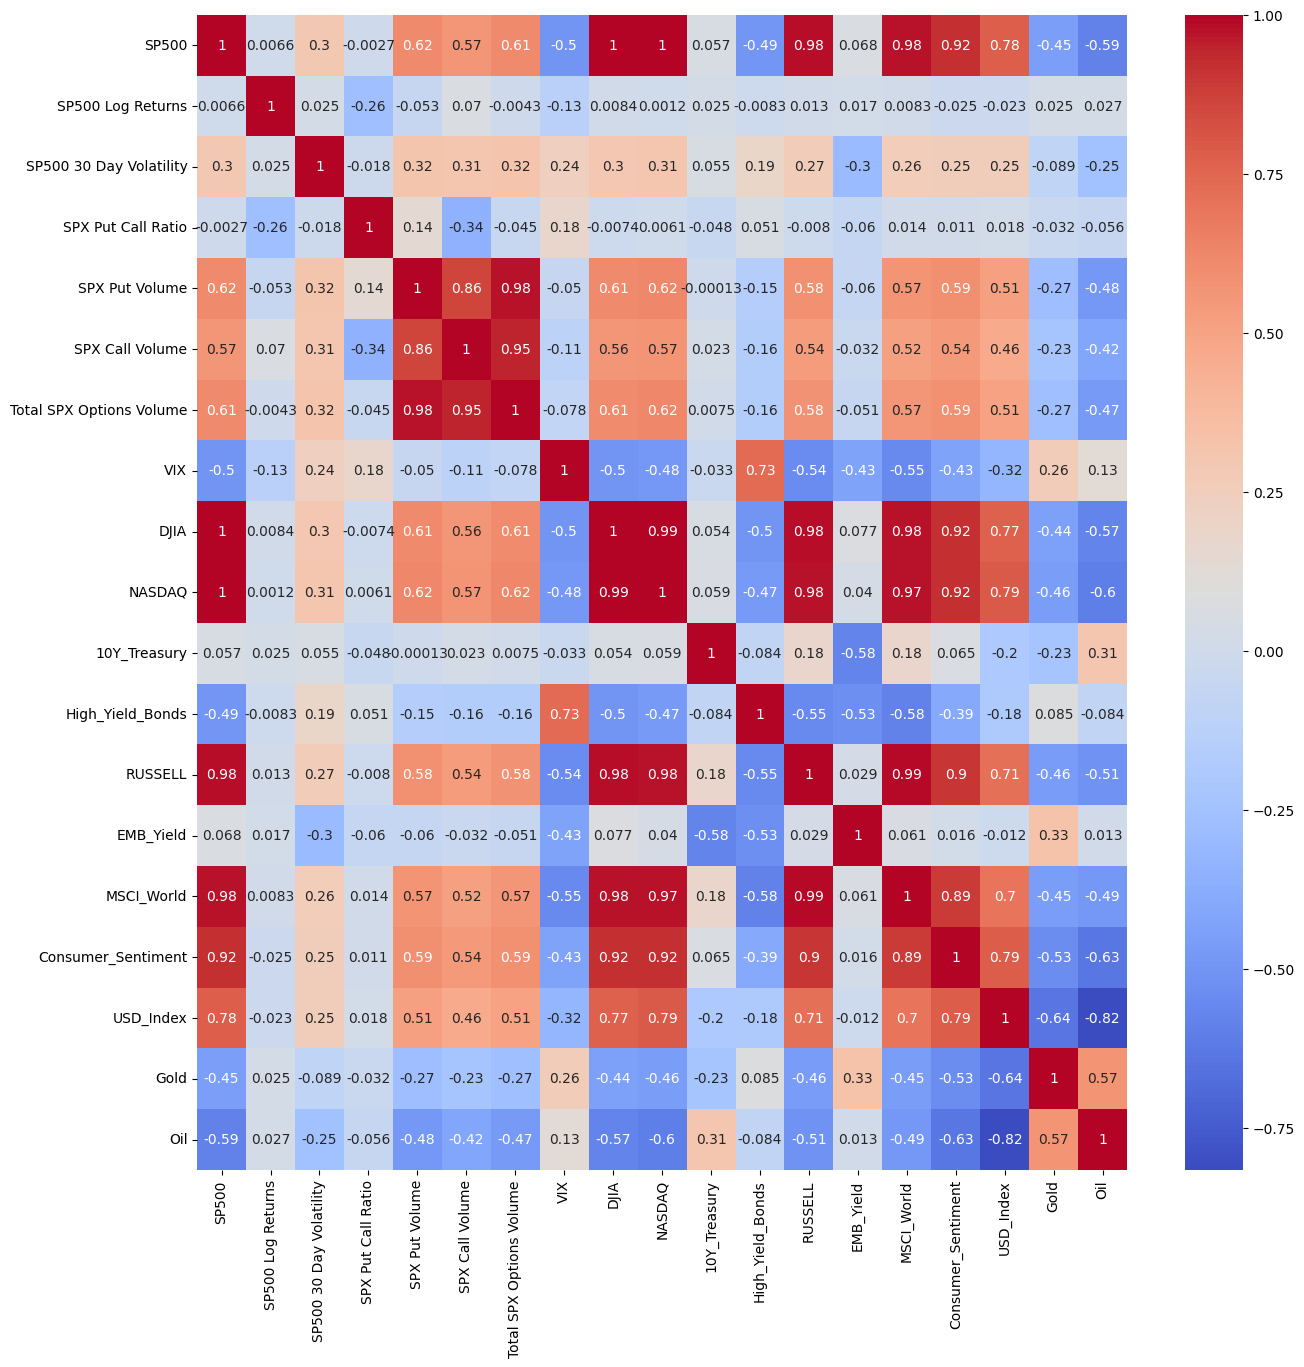

In [381]:
# create a correlation matrix with heatmap

corr_matrix = daily_df.corr(method='spearman')
fig = plt.figure(figsize=(15,15))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

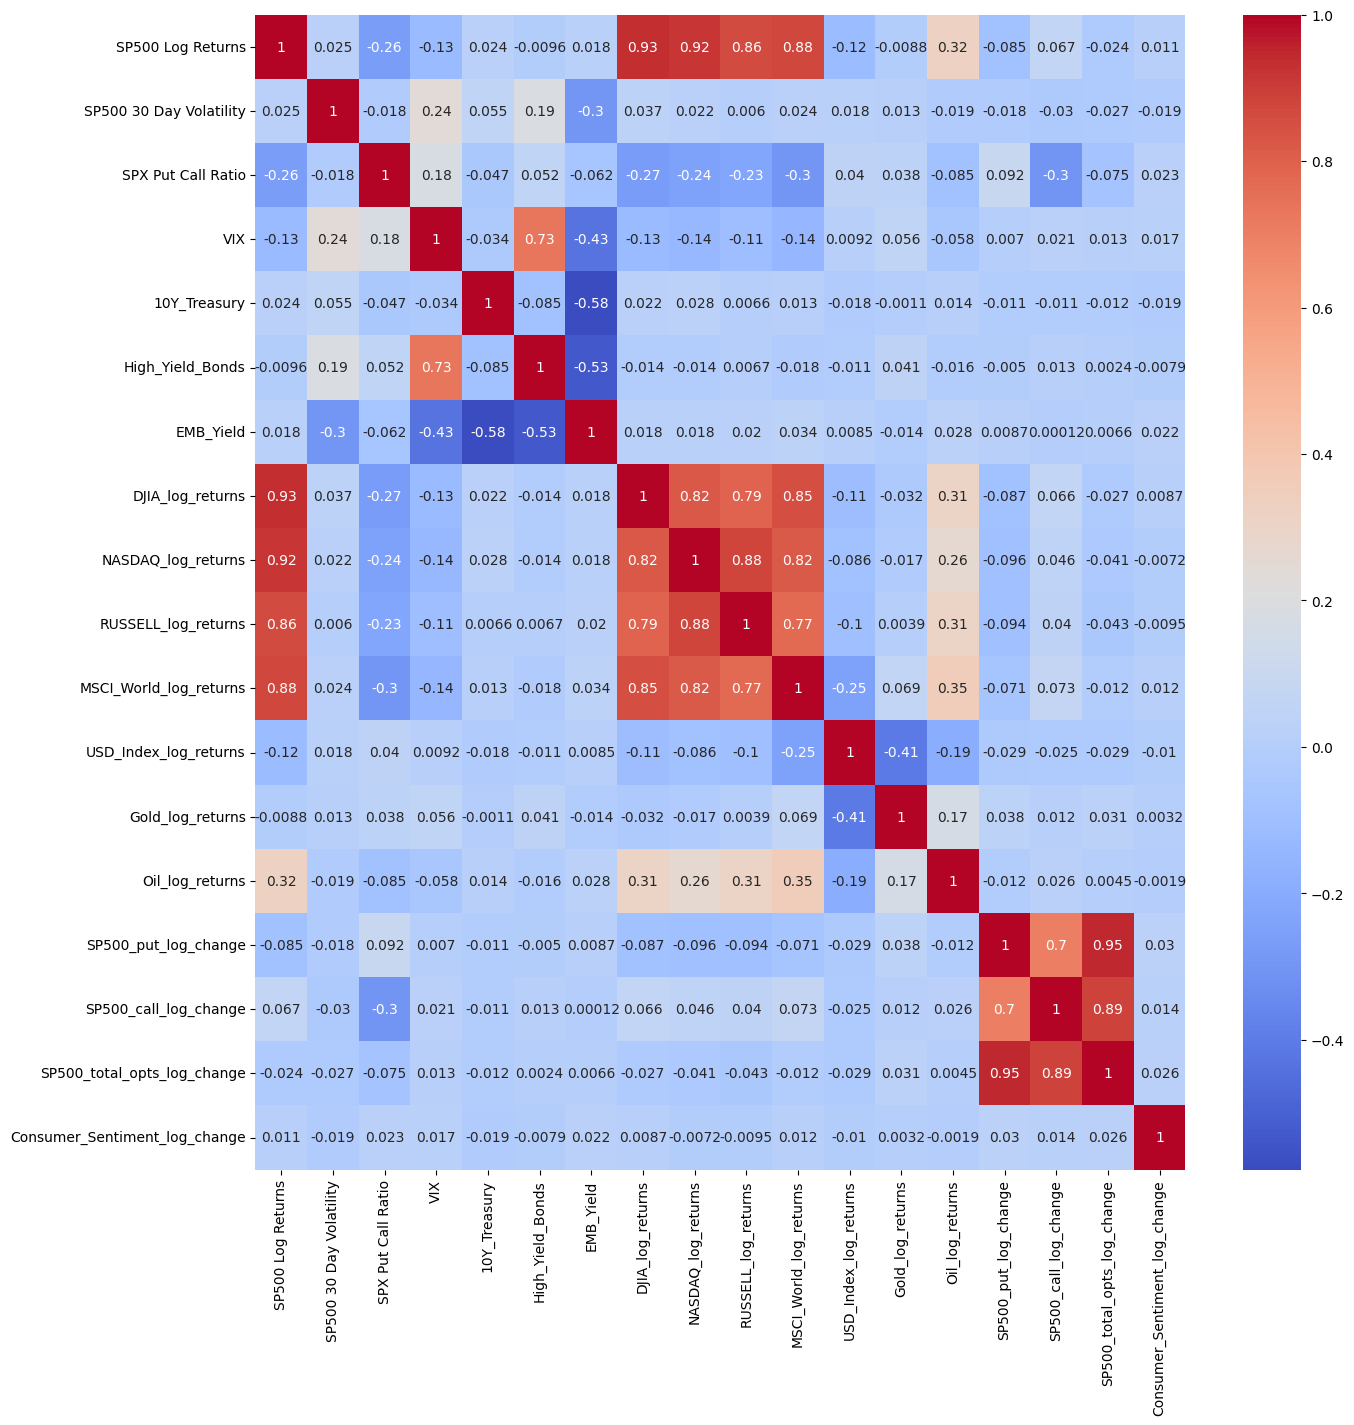

In [382]:
# create a correlation matrix with heatmap

corr_matrix = daily_df_log_returns.corr(method='spearman')
fig = plt.figure(figsize=(15,15))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

The Spearman rank correlation coefficient shows no significantly different patterns. Based of the differences in correlation between price levels and daily returns, it might be sensible to include both variables as features for the volatility prediction.

### 5 Create feature dataset


In [383]:
# combine daily_df and daily_df_log_returns and drop rows with missing values

daily_df_combined = pd.concat([daily_df, daily_df_log_returns], axis=1)
daily_df_combined = daily_df_combined.dropna()

# remove duplicate columns

daily_df_combined = daily_df_combined.loc[:,~daily_df_combined.columns.duplicated()]
daily_df_combined.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2264 entries, 2010-07-08 to 2019-10-04
Data columns (total 30 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   SP500                          2264 non-null   float64
 1   SP500 Log Returns              2264 non-null   float64
 2   SP500 30 Day Volatility        2264 non-null   float64
 3   SPX Put Call Ratio             2264 non-null   float64
 4   SPX Put Volume                 2264 non-null   float64
 5   SPX Call Volume                2264 non-null   float64
 6   Total SPX Options Volume       2264 non-null   float64
 7   VIX                            2264 non-null   float64
 8   DJIA                           2264 non-null   float64
 9   NASDAQ                         2264 non-null   float64
 10  10Y_Treasury                   2264 non-null   float64
 11  High_Yield_Bonds               2264 non-null   float64
 12  RUSSELL                       

In [384]:
# save daily_df_combined to csv

daily_df_combined.to_csv('data/features_target.csv')

In [385]:
daily_df_combined.columns

Index(['SP500', 'SP500 Log Returns', 'SP500 30 Day Volatility',
       'SPX Put Call Ratio', 'SPX Put Volume', 'SPX Call Volume',
       'Total SPX Options Volume', 'VIX', 'DJIA', 'NASDAQ', '10Y_Treasury',
       'High_Yield_Bonds', 'RUSSELL', 'EMB_Yield', 'MSCI_World',
       'Consumer_Sentiment', 'USD_Index', 'Gold', 'Oil', 'DJIA_log_returns',
       'NASDAQ_log_returns', 'RUSSELL_log_returns', 'MSCI_World_log_returns',
       'USD_Index_log_returns', 'Gold_log_returns', 'Oil_log_returns',
       'SP500_put_log_change', 'SP500_call_log_change',
       'SP500_total_opts_log_change', 'Consumer_Sentiment_log_change'],
      dtype='object')